# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# 2. Loading and Cleaning with Pandas

In [3]:
traindf=pd.read_csv('train-data.csv')
traindf.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
traindf = traindf.drop('Unnamed: 0', axis=1)
traindf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
testdf=pd.read_csv('test-data.csv')
testdf.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [6]:
testdf = testdf.drop('Unnamed: 0', axis=1)
testdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [7]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [8]:
traindf.shape

(6019, 13)

In [9]:
testdf.shape

(1234, 12)

In [10]:
traindf.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
traindf.Seats.mode()

0    5.0
dtype: float64

In [12]:
traindf['Seats'].fillna(value= 5.0, inplace=True)

In [13]:
# traindf.astype({'col1': 'int32'}).dtypes
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [14]:
traindf['Mileage']=traindf['Mileage'].str.replace('km/kg', ' ')
traindf['Mileage']=traindf['Mileage'].str.replace('kmpl', ' ')
traindf['Engine']=traindf['Engine'].str.replace('CC', ' ')
traindf['Power']=traindf['Power'].str.replace('bhp', ' ')
traindf

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,NaN,2.65


In [15]:
traindf.astype({'Mileage': 'float'}).dtypes
traindf.astype({'Engine': 'float'}).dtypes
traindf['Power'] = pd.to_numeric(traindf['Power'], errors='coerce')
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

In [16]:
print(traindf.Mileage.mode())
print(traindf.Engine.mode())
print(traindf.Power.mode())

0    17.0  
dtype: object
0    1197  
dtype: object
0    74.0
dtype: float64


In [17]:
traindf['Mileage'].fillna(value=17.0, inplace=True)
traindf['Engine'].fillna(value=1197.0, inplace=True)
traindf['Power'].fillna(value=74.0, inplace=True)

In [18]:
traindf.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [19]:
traindf = traindf.drop('New_Price', axis=1)
traindf.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [20]:
#checking the unique names of the car
traindf['Name'].nunique()

1876

In [21]:
traindf['Brand_Name'] = traindf['Name'].str.split(' ').str[0]
traindf.groupby('Brand_Name').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Brand_Name,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,1
Audi,69,11,12,180,2,1,3,38,11,29,5,166
BMW,87,11,14,190,2,1,3,46,9,26,4,182
Bentley,1,1,1,1,1,1,1,1,1,1,1,1
Chevrolet,43,11,15,107,2,2,3,25,11,25,6,80
Datsun,9,7,3,12,1,1,1,5,2,4,2,12
Fiat,20,9,11,26,2,1,3,12,5,13,1,23
Force,2,2,1,2,1,1,1,1,2,2,1,2
Ford,114,11,17,237,2,2,4,40,16,33,3,178


In [22]:
traindf = traindf.drop('Name', axis=1)

In [23]:
traindf

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.10,5.0,2.65,Maruti


In [24]:
testdf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [25]:
testdf.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [26]:
testdf['Mileage']=testdf['Mileage'].str.replace('km/kg', ' ')
testdf['Mileage']=testdf['Mileage'].str.replace('kmpl', ' ')
testdf['Engine']=testdf['Engine'].str.replace('CC', ' ')
testdf['Power']=testdf['Power'].str.replace('bhp', ' ')
testdf

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


In [27]:
traindf["Engine"] = traindf["Engine"].astype(float)
traindf["Mileage"] = traindf["Mileage"].astype(float)
testdf['Power'] = pd.to_numeric(testdf['Power'], errors='coerce')
testdf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                float64
Seats                float64
New_Price             object
dtype: object

In [28]:
print(testdf.Seats.mode())
print(testdf.Mileage.mode())
print(testdf.Engine.mode())
print(testdf.Power.mode())

0    5.0
dtype: float64
0    17.0  
dtype: object
0    1197  
dtype: object
0    74.0
dtype: float64


In [29]:
testdf['Seats'].fillna(value= 5.0, inplace=True)
testdf['Mileage'].fillna(value= 17.0, inplace=True)
testdf['Engine'].fillna(value= 1197, inplace=True)
testdf['Power'].fillna(value= 74.0, inplace=True)
testdf.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1052
dtype: int64

In [30]:
testdf = testdf.drop('New_Price', axis=1)
testdf.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [31]:
#checking the unique names of the car
testdf['Name'].nunique()

768

In [32]:
testdf['Brand_Name'] = testdf['Name'].str.split(' ').str[0]
testdf.groupby('Brand_Name').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
Brand_Name,,,,,,,,,,,
Audi,30,11,10,46,2,2,3,19,3,14,2
BMW,28,10,10,40,2,1,3,23,8,13,2
Bentley,1,1,1,1,1,1,1,1,1,1,1
Chevrolet,20,10,12,29,2,2,3,17,10,19,4
Datsun,3,3,3,4,1,1,1,2,2,2,2
Fiat,10,5,7,10,2,2,3,7,4,8,2
Ford,38,11,14,47,2,2,2,20,11,19,2
Hindustan,1,1,1,1,1,1,1,1,1,1,1
Honda,73,11,14,116,2,2,3,35,7,20,2


In [33]:
testdf = testdf.drop('Name', axis=1)

In [34]:
testdf

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Name
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.30,5.0,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,74.00,5.0,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5.0,Volkswagen
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5.0,Volkswagen
1231,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5.0,Nissan
1232,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.60,5.0,Volkswagen


# 3.  EDA and Visualization

In [35]:
traindf.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


<function matplotlib.pyplot.show(close=None, block=None)>

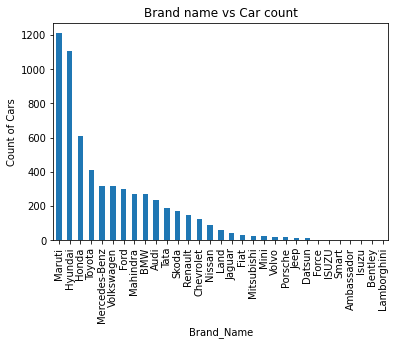

In [36]:
#Brand_name Vs Car count
plt.xlabel("Brand_Name")
plt.ylabel("Count of Cars")
plt.title("Brand name vs Car count")
traindf['Brand_Name'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

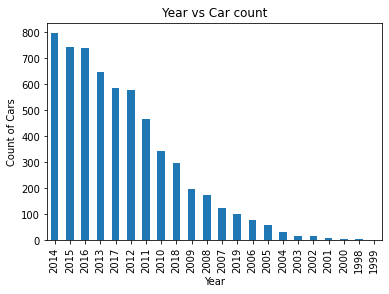

In [37]:
#Year Vs Car count
plt.xlabel("Year")
plt.ylabel("Count of Cars")
plt.title("Year vs Car count")
traindf['Year'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

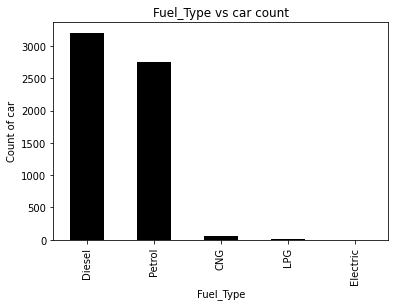

In [38]:
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
traindf['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='black')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

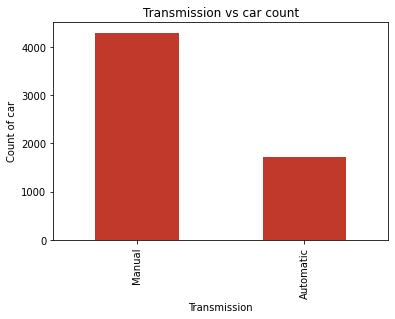

In [39]:
#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
traindf['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

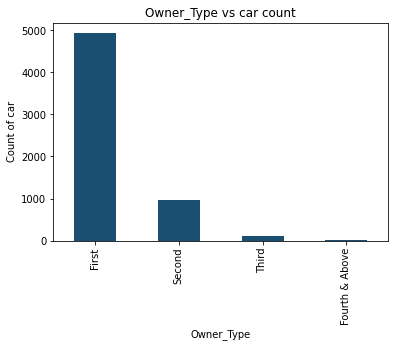

In [40]:
#owner type
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
traindf['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#1B4F72')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

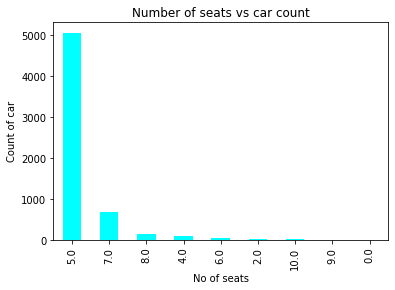

In [41]:
#seats
plt.xlabel("No of seats")
plt.ylabel("Count of car")
traindf['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.show

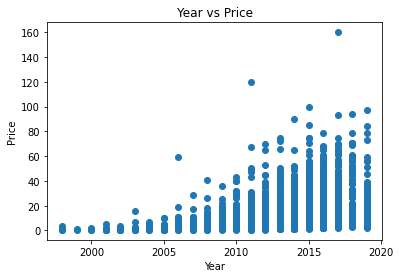

In [42]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(traindf.Year,traindf.Price)

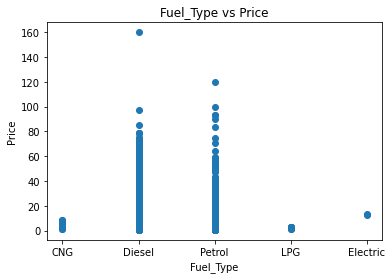

In [43]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(traindf.Fuel_Type,traindf.Price)


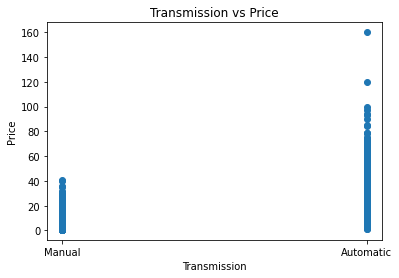

In [44]:
#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(traindf.Transmission,traindf.Price)


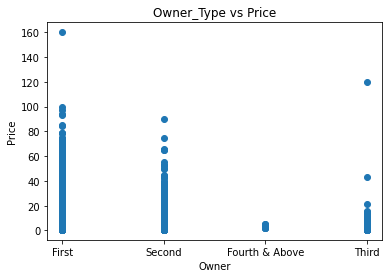

In [45]:
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(traindf.Owner_Type,traindf.Price)

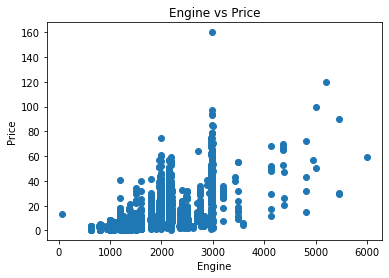

In [46]:
#Engine vs price
plt.title("Engine vs Price")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.scatter(traindf.Engine, traindf.Price)

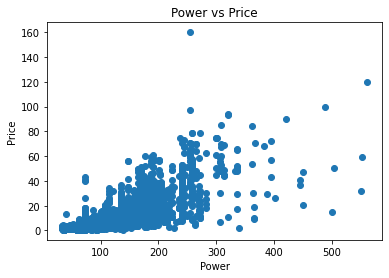

In [47]:
plt.title("Power vs Price")
plt.xlabel("Power")
plt.ylabel("Price")
plt.scatter(traindf.Power, traindf.Price)

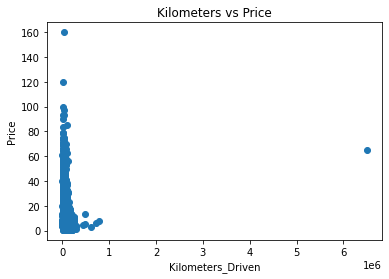

In [48]:
#Kilometers Driven Vs Price
plt.title("Kilometers vs Price")
plt.xlabel("Kilometers_Driven")
plt.ylabel("Price")
plt.scatter(traindf.Kilometers_Driven, traindf.Price)

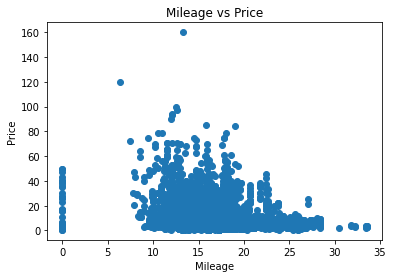

In [49]:
#Mileage Vs Price
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(traindf.Mileage, traindf.Price)

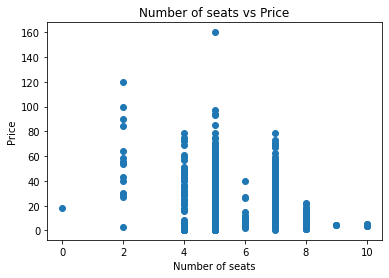

In [50]:
#Number of seats Vs Price
plt.title("Number of seats vs Price")
plt.xlabel("Number of seats")
plt.ylabel("Price")
plt.scatter(traindf.Seats, traindf.Price)

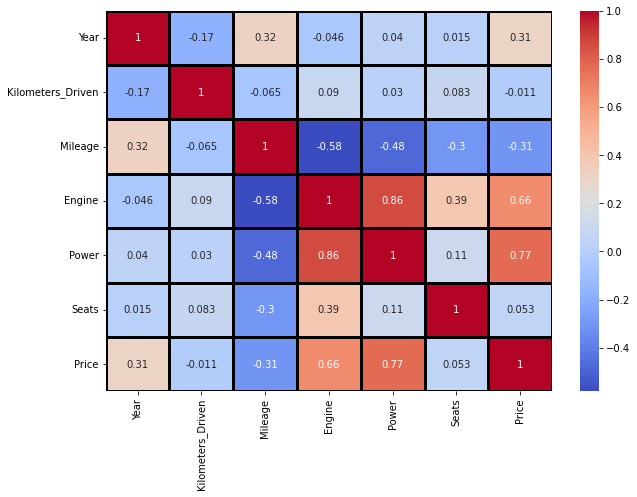

In [51]:
#Correlation Matrix
corrMatrix = traindf.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

# 4. Feature Engineering 

   # 4.1 Outlier Detection  and removing using IQR Method(Kilometers_Driven, Power and Engine) for train data
   

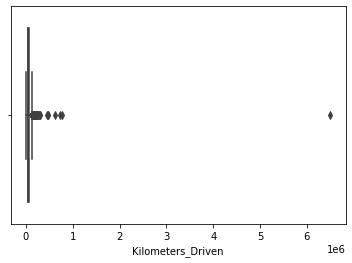

In [52]:
# ploting boxplot to check outliers
#Kilometers_Driven
sns.boxplot(x=traindf['Kilometers_Driven'])
plt.show()

In [53]:
Q1 = traindf.Kilometers_Driven.quantile(0.25)
Q3 = traindf.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [54]:
traindf[(traindf.Kilometers_Driven < lowerlimit)  | (traindf.Kilometers_Driven > upperlimit)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
29,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,4.00,Toyota
64,Chennai,2016,178000,Diesel,Manual,First,25.0,1396.0,69.00,5.0,2.50,Tata
77,Chennai,2006,230000,Petrol,Manual,Third,12.4,1998.0,132.00,8.0,4.50,Toyota
154,Pune,2012,136997,Diesel,Automatic,First,17.2,1968.0,138.10,5.0,8.50,Skoda
164,Kochi,2014,147898,Diesel,Manual,First,22.7,1498.0,89.84,5.0,4.42,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Chennai,2008,192000,Diesel,Manual,First,12.8,2494.0,102.00,8.0,6.85,Toyota
5871,Pune,2009,180000,Diesel,Manual,First,10.9,2499.0,143.00,7.0,7.50,Ford
5914,Hyderabad,2003,132000,Diesel,Manual,First,18.7,1896.0,66.00,5.0,2.25,Skoda
5953,Jaipur,2012,140000,Diesel,Manual,First,20.0,1399.0,68.00,5.0,2.51,Ford


In [55]:
traindf1 = traindf[(traindf.Kilometers_Driven > lowerlimit) & (traindf.Kilometers_Driven < upperlimit)]
traindf1.shape

(5817, 12)

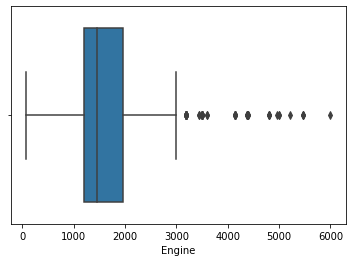

In [56]:
#Engine
sns.boxplot(x=traindf1['Engine'])
plt.show()

In [57]:
EQ1 = traindf1.Engine.quantile(0.25)
EQ3 = traindf1.Engine.quantile(0.75)
IQR = EQ3 - EQ1
Eupperlimit = EQ3 + (IQR * 1.5)
Elowerlimit = EQ1 - (IQR * 1.5)

In [58]:
traindf1[(traindf1.Engine < Elowerlimit)  | (traindf1.Engine > Eupperlimit)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
70,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,14.50,Porsche
152,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,30.00,Mercedes-Benz
459,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,48.91,Audi
586,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,29.77,Audi
589,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.90,5.0,19.00,Mercedes-Benz
693,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.54,Mercedes-Benz
703,Coimbatore,2017,50484,Diesel,Automatic,First,10.91,3198.0,197.20,7.0,31.12,Ford
798,Bangalore,2015,10000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.00,Mercedes-Benz
806,Coimbatore,2017,59636,Diesel,Automatic,First,10.91,3198.0,197.00,7.0,29.20,Ford
926,Hyderabad,2010,10000,Petrol,Manual,First,9.00,3436.0,74.00,2.0,40.00,Porsche


In [59]:
traindf2 = traindf1[(traindf1.Engine > Elowerlimit) & (traindf1.Engine < Eupperlimit)]
traindf2.shape

(5757, 12)

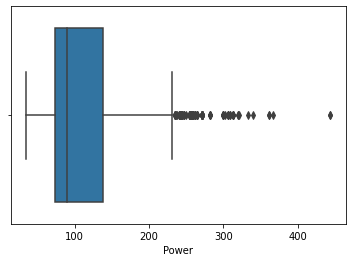

In [60]:
# Power
sns.boxplot(x=traindf2['Power'])
plt.show()

In [61]:
PQ1 = traindf2.Power.quantile(0.25)
PQ3 = traindf2.Power.quantile(0.75)
PIQR = PQ3 - PQ1
Pupperlimit = PQ3 + (PIQR * 1.5)
Plowerlimit = PQ1 - (PIQR * 1.5)

In [62]:
traindf2[(traindf2.Power < Plowerlimit)  | (traindf2.Power > Pupperlimit)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
38,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00,Mercedes-Benz
103,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,9.80,Audi
107,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74,2993.0,270.90,5.0,24.00,Jaguar
134,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.00,Mercedes-Benz
148,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,37.00,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
5803,Chennai,2013,100000,Diesel,Automatic,Second,11.30,2987.0,254.80,7.0,38.00,Mercedes-Benz
5868,Kochi,2014,51240,Diesel,Automatic,First,8.20,2993.0,245.00,4.0,29.52,BMW
5927,Coimbatore,2018,29091,Diesel,Automatic,First,13.22,2967.0,241.40,5.0,45.52,Audi
5946,Bangalore,2016,16000,Diesel,Automatic,First,14.69,2993.0,258.00,5.0,48.00,BMW


In [63]:
traindf_final = traindf2[(traindf2.Power > Plowerlimit) & (traindf2.Power < Pupperlimit)]
traindf_final.shape

(5564, 12)

In [64]:
traindf_final

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


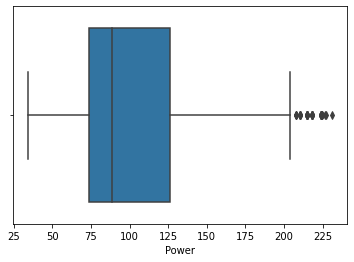

In [65]:
#Power
sns.boxplot(x=traindf_final['Power'])
plt.show()

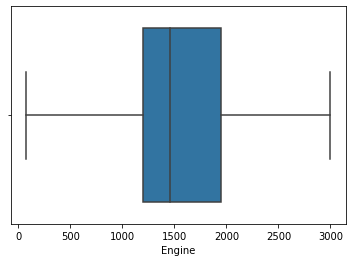

In [66]:
#Engine
sns.boxplot(x=traindf_final['Engine'])
plt.show()

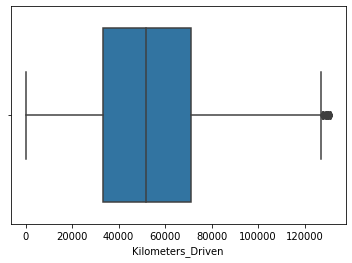

In [67]:
#Kilometers_Driven
sns.boxplot(x=traindf_final['Kilometers_Driven'])
plt.show()

   # 4.2 Outlier Detection  and removing using IQR Method(Kilometers_Driven, Power and Engine) for test data

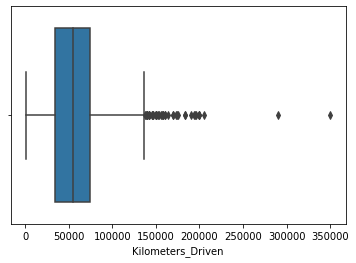

In [68]:
#Kilometers_Driven
sns.boxplot(x=testdf['Kilometers_Driven'])
plt.show()

In [69]:
Q1 = testdf.Kilometers_Driven.quantile(0.25)
Q3 = testdf.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [70]:
testdf[(testdf.Kilometers_Driven < lowerlimit)  | (testdf.Kilometers_Driven > upperlimit)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Name
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,74.00,5.0,Toyota
17,Chennai,2009,140000,Diesel,Manual,First,13.8,1399,68.00,5.0,Ford
20,Pune,2016,200000,Diesel,Manual,First,23.2,1248,73.94,5.0,Maruti
58,Chennai,2011,150000,Diesel,Manual,Second,19.09,1396,69.00,5.0,Tata
87,Kochi,2010,142299,Petrol,Manual,First,13.07,1368,88.76,5.0,Tata
142,Jaipur,2011,157301,Diesel,Manual,Second,20.54,1598,103.60,5.0,Volkswagen
191,Chennai,2006,140000,Diesel,Manual,Second,13.5,1405,74.00,5.0,Tata
223,Chennai,2015,196000,Diesel,Manual,Second,12.2,1948,68.00,10.0,Tata
265,Hyderabad,2008,200000,Diesel,Manual,Second,12.8,2494,102.00,8.0,Toyota
269,Hyderabad,2005,150000,Diesel,Manual,Second,14.8,2499,80.00,10.0,Chevrolet


In [71]:
testdf1 = testdf[(testdf.Kilometers_Driven > lowerlimit) & (testdf.Kilometers_Driven < upperlimit)]
testdf1.shape

(1189, 11)

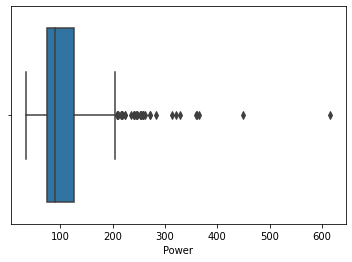

In [72]:
#Power
sns.boxplot(x=testdf1['Power'])
plt.show()

In [73]:
PQ1 = testdf.Power.quantile(0.25)
PQ3 = testdf.Power.quantile(0.75)
PIQR = PQ3 - PQ1
Pupperlimit = PQ3 + (PIQR * 1.5)
Plowerlimit = PQ1 - (PIQR * 1.5)

In [74]:
testdf[(testdf.Power < Plowerlimit)  | (testdf.Power > Pupperlimit)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Name
117,Kochi,2012,61665,Diesel,Automatic,First,16.73,2993,218.00,5.0,BMW
126,Bangalore,2016,26900,Diesel,Automatic,First,12.0,2987,224.00,7.0,Mercedes-Benz
165,Kochi,2015,69095,Diesel,Automatic,First,11.3,2987,254.80,7.0,Mercedes-Benz
167,Mumbai,2008,65000,Petrol,Automatic,Third,10.13,3498,364.90,5.0,Mercedes-Benz
185,Kochi,2013,66848,Diesel,Automatic,First,11.8,2967,246.70,5.0,Audi
193,Chennai,2017,16000,Diesel,Automatic,First,16.77,2993,261.49,5.0,BMW
202,Kolkata,2014,12000,Diesel,Automatic,First,14.74,2993,270.90,5.0,Jaguar
260,Coimbatore,2018,14730,Petrol,Automatic,First,13.5,1999,246.74,5.0,Jaguar
289,Chennai,2015,67000,Diesel,Automatic,First,11.3,2987,254.80,7.0,Mercedes-Benz
293,Coimbatore,2015,53093,Diesel,Automatic,Second,12.07,2967,241.40,7.0,Audi


In [75]:
testdf_final = testdf[(testdf.Power > Plowerlimit) & (testdf.Power < Pupperlimit)]
testdf_final.shape

(1187, 11)

In [76]:
traindf_final

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


In [77]:
testdf_final

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Name
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.30,5.0,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,74.00,5.0,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5.0,Volkswagen
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5.0,Volkswagen
1231,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5.0,Nissan
1232,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.60,5.0,Volkswagen


# Log Transformation for training data

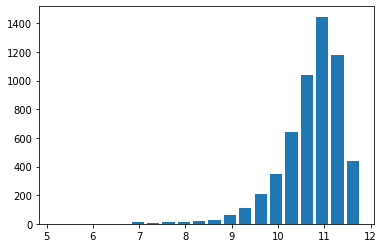

In [78]:
#Applying Log transformation to Kilometers driven
x = np.log(traindf_final['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

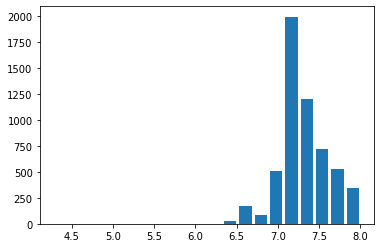

In [79]:
#Applying Log transformation to Engine
x = np.log(traindf_final['Engine'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

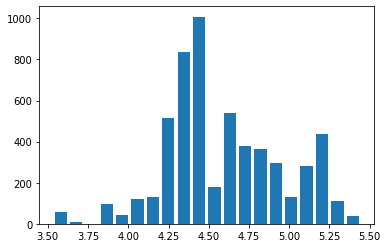

In [80]:
#Applying Log transformation to Power
x = np.log(traindf_final['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

# Log transformation for test data

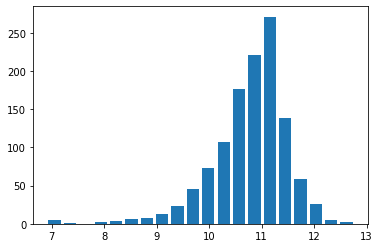

In [81]:
#Applying Log transformation to Kilometers driven
x = np.log(testdf_final['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

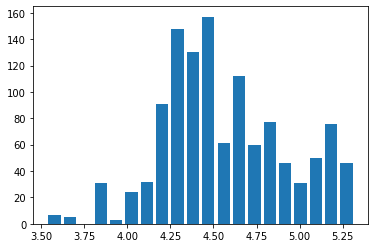

In [82]:
#Applying Log transformation to Engine
x = np.log(testdf_final['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

# Feature Scaling using MinMax Scaler for training data

In [83]:
traindf_final.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand_Name            object
dtype: object

In [84]:
numeric_columns = ['Year','Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'Price']
numericdf = traindf_final[numeric_columns]

In [85]:
 numericdf.isna().sum()

Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [86]:
# Dataframe before scaling
numericdf.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [88]:
 #dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,0.571429,0.549030,0.793083,0.316365,0.121686,0.375,0.021543
1,0.809524,0.312079,0.586464,0.515887,0.467242,0.375,0.198323
2,0.619048,0.350297,0.542636,0.385036,0.276790,0.375,0.066765
3,0.666667,0.663683,0.619261,0.401777,0.277095,0.625,0.091432
4,0.714286,0.309557,0.453190,0.647762,0.541392,0.375,0.284493


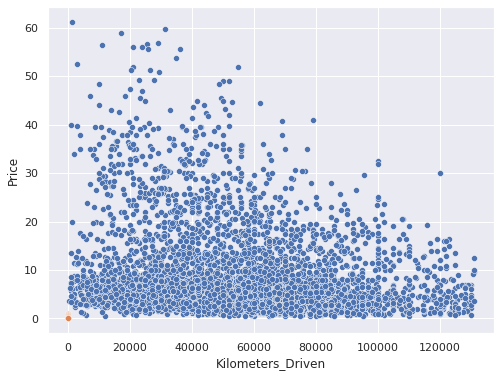

In [89]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=traindf_final,x='Kilometers_Driven',y='Price')
sns.scatterplot(data = transformdf,x='Kilometers_Driven',y='Price')
plt.show()

# Feature Scaling using MinMax Scaler for training data

In [90]:
testdf_final.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                float64
Seats                float64
Brand_Name            object
dtype: object

In [91]:
test_numeric_columns = ['Year','Kilometers_Driven','Mileage','Power', 'Seats']
test_numericdf = testdf_final[test_numeric_columns]

In [92]:
# Dataframe before scaling
test_numericdf.head()

,Year,Kilometers_Driven,Mileage,Power,Seats
0,2014,40929,32.26,58.20,4.0
1,2013,54493,24.7,47.30,5.0
2,2017,34000,13.68,147.80,7.0
3,2012,139000,23.59,74.00,5.0
4,2014,29000,18.5,82.85,5.0


In [93]:
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_numeric = scaler.fit_transform(test_numericdf)

In [94]:
 #dataframe after scaling
test_transformdf = pd.DataFrame(data=test_numeric,columns=test_numeric_columns)
test_transformdf.head()

,Year,Kilometers_Driven,Mileage,Power,Seats
0,0.782609,0.114410,1.000000,0.141343,0.000000
1,0.739130,0.153275,0.765654,0.077150,0.166667
2,0.913043,0.094556,0.424055,0.669022,0.500000
3,0.695652,0.395415,0.731246,0.234393,0.166667
4,0.782609,0.080229,0.573466,0.286514,0.166667


In [95]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [96]:
traindf_final['Brand_Name'] = label_encoder.fit_transform(traindf_final['Brand_Name'])
traindf_final['Location'] = label_encoder.fit_transform(traindf_final['Location'])
traindf_final['Fuel_Type'] = label_encoder.fit_transform(traindf_final['Fuel_Type'])
traindf_final['Transmission'] = label_encoder.fit_transform(traindf_final['Transmission'])
traindf_final['Owner_Type'] = label_encoder.fit_transform(traindf_final['Owner_Type'])


testdf_final['Brand_Name'] = label_encoder.fit_transform(testdf_final['Brand_Name'])
testdf_final['Location'] = label_encoder.fit_transform(testdf_final['Location'])
testdf_final['Fuel_Type'] = label_encoder.fit_transform(testdf_final['Fuel_Type'])
testdf_final['Transmission'] = label_encoder.fit_transform(testdf_final['Transmission'])
testdf_final['Owner_Type'] = label_encoder.fit_transform(testdf_final['Owner_Type'])

traindf_final.head()

/tmp/ipykernel_10350/4054707840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf_final['Brand_Name'] = label_encoder.fit_transform(traindf_final['Brand_Name'])
/tmp/ipykernel_10350/4054707840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf_final['Location'] = label_encoder.fit_transform(traindf_final['Location'])
/tmp/ipykernel_10350/4054707840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,16
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,9
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,8
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,16
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,1


# 5. Training Model

In [99]:
y = traindf_final.Price
X = traindf_final.drop(['Price'],axis=1)

In [100]:
 from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [104]:
 # Creating the model using scikit learn 
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [105]:
LinearRegression()

LinearRegression()

In [119]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=200)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [120]:
 RandomForestRegressor(n_estimators=200)

RandomForestRegressor(n_estimators=200)

# 6. Prediction

In [106]:
y_pred = model.predict(X_valid)
y_pred

array([ 1.13148981, 10.8717526 ,  6.96373949, ..., 12.29742837,
       -4.28025067,  5.0996336 ])

In [115]:
 from sklearn import metrics
from sklearn.metrics import r2_score

print('R-squared training data: ', regression_model.score(X_train, y_train))
print('R-squared test data: ', regression_model.score(X_valid, y_valid))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print("R2 score : %f" % r2_score(y_valid,y_pred))
print('MSE: ', metrics.mean_squared_error(y_valid, y_pred))

R-squared training data:  0.6964437620530364
R-squared test data:  0.7016553649315838
Mean Absolute Error: 2.8945145069299603
Root Mean Squared Error: 4.390308267967884
R2 score : 0.701655
MSE:  19.274806687787162


In [121]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([2.44875 , 7.392125, 6.75775 , ..., 8.72665 , 0.92155 , 4.13895 ])

In [123]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.1837109742010012
Mean Squared Error: 4.6971153989308085
Root Mean Squared Error: 2.1672829531306723
R2 score : 0.927296


# 7. Evaluating your Model

In [116]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.6964437620530364
Test set accuracy :  0.7016553649315838


In [118]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(100)

,Actual Price,Predicted Price
3367,2.40,1.131490
722,6.25,10.871753
3326,6.25,6.963739
6007,2.75,4.324733
5096,25.00,21.534560
...,...,...
3564,3.30,6.269468
2421,3.70,4.425066
4985,3.21,1.576428
3976,8.25,7.138034


In [125]:
Y_train_predicted1 = model1.predict(X_train)
Y_test_predicted1 = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted1))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted1))

Train set accuracy:  0.9875727569402057
Test set accuracy :  0.9272958114565074


In [126]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.1837109742010012
Mean Squared Error: 4.6971153989308085
Root Mean Squared Error: 2.1672829531306723
R2 score : 0.927296


In [127]:
Result1 = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted1})
Result1.head(100)

,Actual Price,Predicted Price
3367,2.40,2.448750
722,6.25,7.392125
3326,6.25,6.757750
6007,2.75,3.490700
5096,25.00,28.178200
...,...,...
3564,3.30,4.078400
2421,3.70,4.254700
4985,3.21,2.684700
3976,8.25,11.933500


# SUBMISSION DATE: 2nd April 2022